# Metrics of classifaction model

## Evaluating a classification model

 - What is the purpose of <code>**model evaluation**</code> and what are common evaluation procedures
 - What is the usage of <code>**classification accuracy**</code>  and what are its limits
 - How does a <code>**confusion matrix**</code> describe te performance of a classifier
 - What <code>**metrics**</code> can be computed from a confusion matrix ?
 - How can we adjust classifier performance by <code>**changing the classification threshold ?**</code> 
 - What is te purspose of and <code>**ROC curve ?**</code> 
 - How does <code>**Area Under the curve (AUC)**</code>  differ from classifation accuracy ?

## Review of model evaluation

The goal of model evaluation and evaluation procedures we know so far. Evaluation answers the question how do we choose between different models. Whether we are choosing between KNN and Logistic regression or selecting optimal tuning parameters or choosing between different sets of features. For all of that we need a pivotal model evaluation procedure to help us estimate <code>**how well a model will generalize to out of sample data**</code>. However we also need an evaluation metric to pair with our procedure so that we could quantify model performance 

## Model evaluation procedures

We talked about different model evaluation procedues starting with training and testing on same data then train test split and finally <code>**k-fold**</code> cross-validation. Training and testing on same data is the classic cause of overfitting in which you build an overly complex model that wont' generalize to new data and thats not usefull. Thus we implement train test split that provides a much better estimate of out of sample performance and a k-fold cross validation is even better by making k splits and averaging results together.

1. Training and testing on the same data
 - Reward overly complex models that "overfit" the training data and won't necessaraly generalize

2. Train/test split
 - Split the dataset into two pieces so that the model can be trained and tested on different data
 - Better estimate of out of sample performance, but still a "high variance" estimate
 - Useful due to its speed, simplicity and flexibility
 
3. K-fold cross validation

 - Systematically create "K" train/test splits and average the results together
 - Event better estimate of out of sample performance
 - Runs "K" times slowe than train/test split

## Model evaluation metrics

We always need an evaluation metric to go along with our choosen procedure and the choice of metric depends on the type of problem we are addressing. For regression problems we have used MAE, MSE, RMSE as our evaluation metrics

 - Regression problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
 - Classification problems: Classifcation accuracy
 
 There are many other important evaluation metrics for classification and thats our focus today.

## Classification accuracy

Before we go any further with new metrics lets review classification accuracy and talk about its stenght and weaknesses. We will use data from UCI machine learning repository. It includes health data and diabetes status from 768 patients.

In [9]:
import pandas as pd
df = pd.read_csv('../data_samples/diabetes.csv')

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's define a classification objective as follows, can we predict diabetes status of a patient given their health measurements.

We are going to define <code>**feature matrix X and response vectory y**</code>

In [21]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
# response_vec = ['Outcome']
X = df[feature_cols]
y = df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = logreg.predict(X_test)

<code>**Classification accuracy:**</code> percentage of correct predictions

In [30]:
from sklearn import metrics

In [47]:
score = metrics.accuracy_score(y_test, y_pred)

In [48]:
print(score)

0.6770833333333334


### Null accuracy
It could be achieved by always predicting the most frequent class

In [37]:
# examine the class distribution of the testing set(using pandas series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [36]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [38]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [43]:
# calculate null accuracy (for binary classification proeblems coded as 0/1)
null_accuracy = max(y_test.mean(), 1 - y_test.mean())

In [44]:
print(null_accuracy)

0.6770833333333333


In [49]:
# calculate null accuracy (for multi-class classification problems)
# though it will only work if y_test is a pandas series
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

The answer is ~ 68% and since is larger that a 32 % we would say that 68 is the null accuracy.
In another words a <code>**dumb model**</code> that always predicts that a patient does not have diabetes will be right 68% of the time. This is obviously not a usefull model but it provides a baseline againts which we want to measure our logistic regression model. When we compare null accuracy of ~ 68% with the logistic regression model of ~ 68% then our model does not look very good. This demonstrates one weakness of classification accuracy as a model evaluation metric in a classification accuracy <code>**does not tell us anything about the underlying distribution of the testing set**</code>. 

### Comparing the true and predicted response values

There is another weakness of classificiation accuracy

In [50]:
print(f'True: {y_test.values[:25]}')
print(f'Pred: {y_pred[:25]}')

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


There is an pattern. Notice when a true response is a zero the model almost always correctly predicts a zero. But when the true respons is one the model rarely predicts a one. In another words the model is ussually making a certain type of errors but not others. But we never know that simply by examining the accuracy. This particular issue will be adressed by the <code>**confusion metrix**</code>

<code>**Conclusion**</code>
 - Classification accuracy is certainly usefull and easiest classification metric to understand
 - It does not tell you the underlying distribution of response values
 - Doesn't tell you what "types" of error our classifier is making

## Confusion matrix

It present a table layout of the different outcomes of prediction and result of a classification problem and helps visualize its outcomes. It helps us identify the correct predictions of a model for different individual classes as well as the errors. 

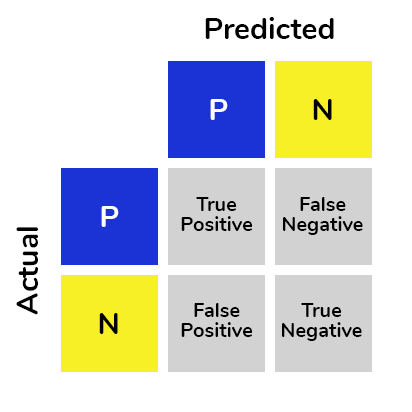


In [51]:
cn = metrics.confusion_matrix(y_test, y_pred)

In [52]:
print(cn)

[[114  16]
 [ 46  16]]


In this case it outputs a 2x2 numpy array. The array is without labels, so i have made a diagram to explain the output. 

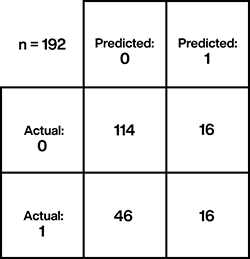

The importance when using confusion matrix function firtly pass the <code>**true response values**</code> as the first argument and predicted as the second argument. Otherwise if order is mixed the <code>**matrix will be reversed but no error will be raised**</code> 

- Every observation in the testing set is represented in exactly one box
- It's a 2x2 matrix because there are <code>**2 response classes**</code>
- The <code>**format shown here is not universal!**</code>

### Basic terminology:

 - <code>**True Positives (TP)**</code>: correctly predicted that they <i>do</i> have diabetes
 - <code>**True Negatives (TN)**</code> correctly predicted that they <i>dont't</i> have diabets
 - <code>**False Positives (FP)**</code> incorrectly predicted that they <i>do</i> have diabetes(Type I error)
 - <code>**False Negatives (FN)**</code> incorrectly predicted that they <i>don't</i> have diabetes( Type II error)

<cod>**Predicting 1 value is called true positive and predicting 0 value is called true negative**</code> 
If you have a trouble to rememeber the difference between FP and FN , just think of FP as cases which the classifier falsely predicted positive, and FN as cases where it falsely predicted negative.

FP are knowned is some fields as <code>**Type I error**</code> and FN as <code>**Type II error**</code>

And finally what we need to know thats this 4 counts are integer counts and <code>**not rates!**</code> 

<div class="alert alert-block alert-info">
Lets say we are working on medical field, and we are talking about cancer diagnosis. On prediction we want <code>**0 False negatives**</code> If we have 5% false positives and 5% false negatives it would be better to have 20% false positives and 0 false negatives.  The same might be applied to a task for autonomous driving, well we don't want any false positives because it might be a direction toward cliff!.
</div>



Confusion matrix metris are performance measures which help us find the accuracy of our classifier. <br>
<code>**There are 4 main metrics:**</code>

<div class="alert alert-block alert-success">

<h2>Practice exercise I</h2>
To make sure that we understand the terminology quite weel lets do an exercise:<br>
Find example of each 4 cases: <code>**TP, TN, FP, FN**</code>
</div>

In [56]:
print(f'True: {y_test.values[:25]}')
print(f'Pred: {y_pred[:25]}')

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [58]:
TP = cn[1, 1]
TN = cn[0, 0]
FP = cn[0, 1]
FN = cn[1, 0]

In [60]:
print(f'TP: {TP}')
print(f'TN: {TN}')
print(f'FP: {FP}')
print(f'FN: {FN}')

TP: 16
TN: 114
FP: 16
FN: 46


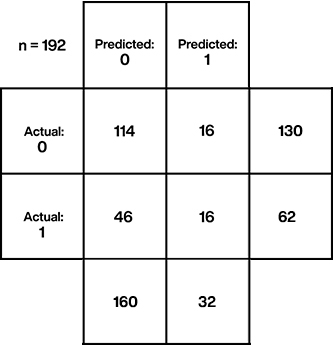

In [76]:
16/(46+16)

0.25806451612903225

In [75]:
cn

array([[114,  16],
       [ 46,  16]], dtype=int64)

## Metrics computed from a confusion matrix

Confusion matrix is usefull to understand the performance of our classifier. But how does it help to choose between models ?  Its not a model evaluation metric. So we can simply tell which to choose model based on best confusion matrix. However there is many metrics which can be <code>**calculated from a confusion matrix and those can be directly used to choose between models**</code>

Lets go through most popular metrics and at the end discuss how to choose which metric to optimize

## Accuracy

As we already can figure out that classification accuracy can be calculated from confusion matrix. This accuracy is used to find the portion of correctly classified values. <code>**It tells us how often our classifier is right**</code>. It is the ratio difference between model's all values and actual values <code>**(tp + tn) / total**</code>
\begin{multline*}
\text{accuracy}(y, \hat{y}) = \dfrac{1}{n} \sum_{i=0}^{n-1} 1(\hat{y}_{i} = y_{i})
\end{multline*}

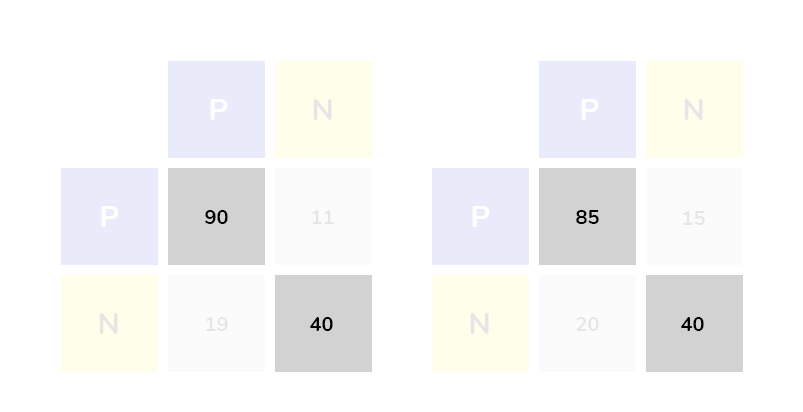

<code>**1) Classifier metrics:**</code>
   * Accuracy = 0.8125

<code>**2) Classifier metrics:**</code>
   * Accuracy = 0.781


In [68]:
print((TP+TN) / float(TP+TN+FP+FN))

0.6770833333333334


In [69]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6770833333333334


________________

## Error

Also knowned as "Misclassification rate" it is equal to <code>**(fp + fn) / total**</code>

\begin{multline*}
\text{error}(y, \hat{y}) = \dfrac{1}{n} \sum_{i=1}^{n} I(\hat{y}_{i} \neq y_{i})
\end{multline*}

In [87]:
print((FP + FN) / float(TP + TN + FP + FN))

0.3229166666666667


In [89]:
print(1 - accuracy)

0.32291666666666663


________________

## Sensitivity

It is used to calculate the models ability to predict positive values. How often does the model actually predict the correct positive values.

<code>**Sensitivity:**</code> when the actual value is positive, how often is the prediction correct ?
 - How "sensitive" is the classifier to detecting positivie instances
 - A.k.a as <code>**"True positive rate" or "Recall"**</code>
 

The recall is the ratio <code>**tp / (tp + fn)**</code> where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

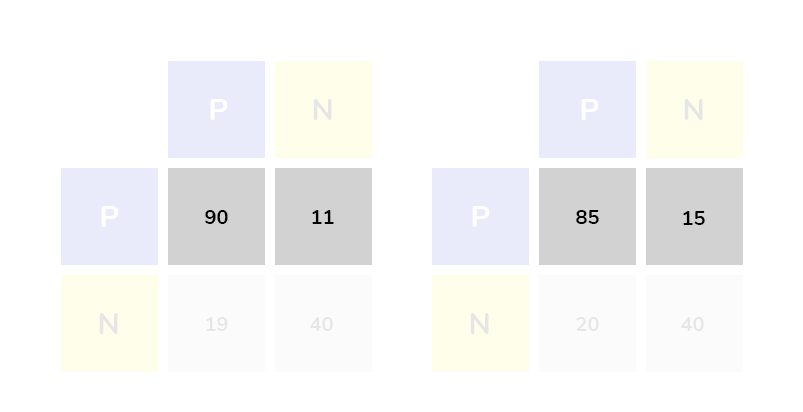

<code>**1) Classifier metrics:**</code>
   * Recall = 0.82

<code>**2) Classifier metrics:**</code>
   * Recall = 0.80


In [94]:
recall = metrics.recall_score(y_test, y_pred)
sesitivity = (TP / float(TP + FN))
print(recall)
print(sesitivity)

0.25806451612903225
0.25806451612903225


______________

## Specificity

When the actual value is negative, how often is the <code>**prediction correct?**</code>
How specific (or selective) is the classifier in predicting instances ?
Just like sensitivity , specificity is what we want to maximize

In [93]:
specificity = (TN / (TN + FP))
print(specificity)

0.8769230769230769


For both sensitivity and specificity the best possible value is 1. So we would say that our classifier is highly specific but rather not highly sensitive.

___________________

## False positive rate

When the actual value is negative, how often is the <code>**prediction incorrect?**</code> Just like specificity only the top row of confusion matrix is relevant to this calculation. Except that this time its the false positive devided by the total of the top row

In [95]:
fps = (FP / (TN + FP))
print(fps)

0.12307692307692308


In [97]:
fps = 1 - specificity
print(fps)

0.12307692307692308


## Precision

The precision is used to calculate model's ability to classify positive values correctly. It answers the question. <code>**When the model predicts a positive value, how iften it is right ?**</code>
It is the ratio <code>**tp / (tp + fp)**</code> where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.<br>

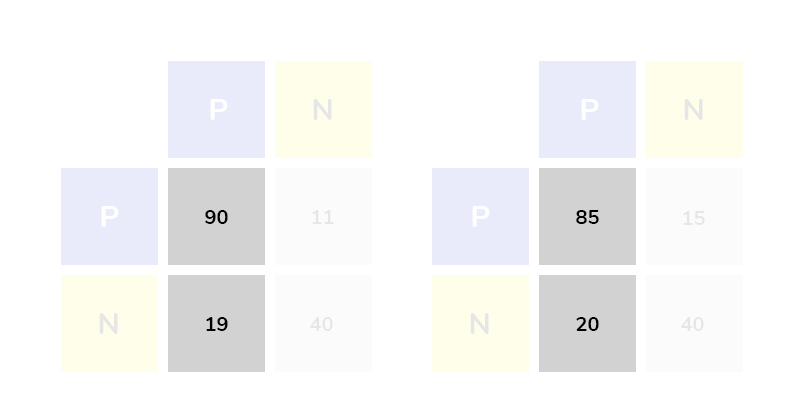

<code>**1) Classifier metrics:**</code>
   * Precision = 0.89

<code>**2) Classifier metrics:**</code>
   * Precision = 0.85
 

We can thing about how precise is the classifier when predicting a possitive instance. 

In [99]:
precision = (TP / (TP + FP))
print(precision)

0.5


In [101]:
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.5


________________

<div class="alert alert-block alert-success">

<h2>Practice exercise II</h2>
<p>Calculate <code>recall measure</code> for classification example below:</p>
</div>

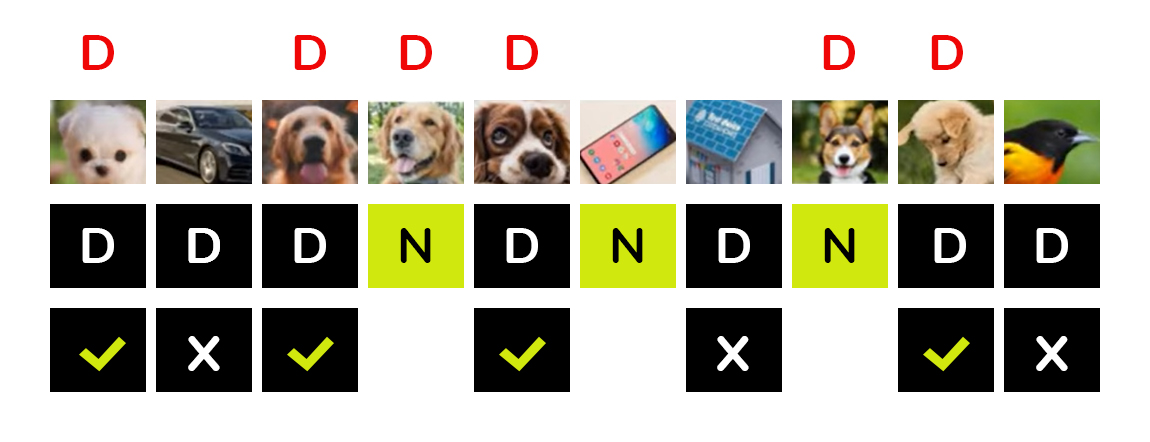

Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

<code>**Conclusion**</code>:
 - Confusion matrix gives you a more complete picture of how your classifier is performing
 - Also allows you to compute various classification metrics and these metrics can guide for model selection

### Which metric should we focus on ?

 - Choise of metric depends on a <code>**bussiness objective:**</code>
     - <code>**Spam filter**</code>(possitive class is "spam"): Optimize for precision or specificity because false negatives(spam goes to the inbox) are more acceptable than false positives(non-spam is caught by the spam filter
     - <code>**Fraudulent transaction detector**</code>(positive class is "fraud"): Optimize for sensitivity because false positives(normal transactions that are flagged as possible fraud) are more acceptable than false negatives(fraudulent transactions that are not detected)

## F1 score

This score provides a way to combine both precision and recall into a single measure that captures both properties. A harmonic mean that gives a overall perfomance score for our model.
So It is the harmonic mean of recall and precision.<code>**It is usefull when you need to take both precision and recall into account**</code>.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches <code>**its best value at 1 and worst score at 0**</code>. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important. <code>**2 * (precision * recall) / (precision + recall)**</code>


In [102]:
#TODO

__________________

## Phi coefficient
Also knowned as <code>**Matthews correlation coefficient**</code>

In [103]:
#TODO

______________

Hopefully this gives a usefull frame of thinking of your own ML problem.

## Adjusting the classification threshold

In [106]:
# printe the first 10 predicted responses
logreg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [107]:
# print the firs 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

Why do we care about these predicted probabilities, since this model predicts the likelyhood of diabetes we migh rank up observations by predicted probabilty of diabetes and prioritize our patient preventative outreach accordingly. Since it makes more sense to contact someone with 95% chance of diabetes than 55% chance. Anyway when we run the predict method for classification model, it firstly predicts the probabilties for each class. And then chooses the class with highest probability as the predicted response.

For this particular binary problem like this one another way of thinking about it is that theres is <code>**0.5**</code> classification threshold and class 1 is predicted only if that threshold is exceeded otherwise class 0 is predicted.

In [108]:
# print the first 10 predicted probabilties for class 1
logreg.predict_proba(X_test)[:10,1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [130]:
# store the ALL predicted probabilties for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

We apply historgram of these probabilties to help demonstrate <code>**how adjusting classification threshold**</code> can impact the performance of the model. We will use matplotlib to plot the histogram of the predicted probabilties of class 1.

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'frequency')

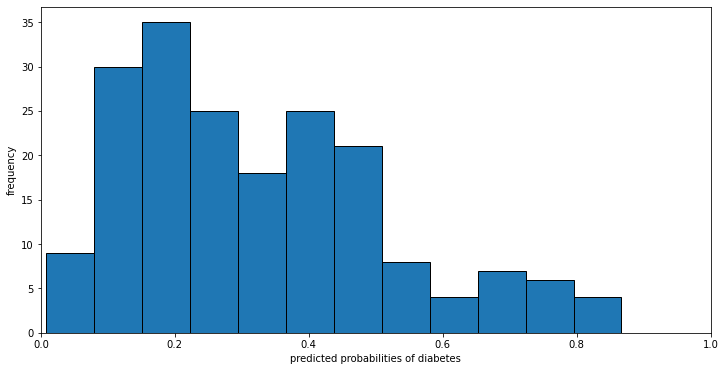

In [131]:
plt.figure(figsize=(12,6))
plt.hist(y_pred_prob, bins=12, ec='black')
plt.xlim(0, 1)
plt.xlabel('predicted probabilities of diabetes')
plt.ylabel('frequency')

This histogram shows us the <code>**distribution of a numerical variable**</code>.We can see by the hight by a third bar for example that about 35 observations had values between 0.2 and 0.3. Given the 0.5 classfication threshold we can see from the histogram that class 1 is rarely predicted since only small minority of testing set observations had a predicted probability above the threshold. Think for a moment what might happen if we would change the threshold number other than 0.5. It turns out that we can adjust both the sensitivity and specificity of a classifier simply by adjusting the threshold.

<code>**Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier**</code>

That is like shifting a threshold bar from 0.5 to 0.3 such that all of  observations with predicted probabilties above 0.3 are now predicted as class 1. This increases sensitivity because the classifier is now more sensitive to possitive instances. Imagine metal detector, it is essentially a classifier which predict a metal. And a threshold is set so that large metal objects is detected but smaller ones not.

In [127]:
# predict diabetes if the predicted probability is greater  than 0.3
from sklearn.preprocessing import binarize

In [162]:
y_pred_class = binarize(y_pred_prob.reshape(-1,1), 0.3)

C:\Python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [163]:
y_pred_prob[:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [166]:
y_pred_class[:10].flatten()

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

Now we see that there is now 5 instances in which class 1 is predicted. To see the inpact of this change accros entire testing set we can print previous confusion matrix stored in cn as weel the new confusion matrix generated with new data. 

In [167]:
cn

array([[114,  16],
       [ 46,  16]], dtype=int64)

In [168]:
new_cn = metrics.confusion_matrix(y_test, y_pred_class)

In [169]:
new_cn

array([[82, 48],
       [17, 45]], dtype=int64)

We see that row totals has not changed, since the rows represent the actuall response values so there is 130 obeservations in the top row and 62 observations in the bottom row. But the column total have changed. Because a lot of class 0 predictions have moved to class one. 

In [170]:
# Recalulate sensitivy

print(45/float(45+17))

0.7258064516129032


In [171]:
print(sesitivity)

0.25806451612903225


It has drastically increased. Lets look at the specificity

In [172]:
print(82/float(82+48))

0.6307692307692307


In [173]:
print(specificity)

0.8769230769230769


It has decreased from 0.87 to 0.63. Specificity has decreased because since observations moved from the left column to the right column, that guarantees that the number of <code>**false positives**</code> will increase and <code>**true negatives**</code> will decrease. That decreases specificity.

<code>**Conclusions**</code>

 - <code>**Threshold of 0.5**</code> is used by default(for binary probles) to convert predicted probabilties into class predictions
 - Threshold can be <code>**adjusted**</code> to increase sensitivity or specificity
 - Sensistivity and specificity have an <code>**inverse relationship**</code>

However sensitivity and specificity has inverse relashionship and increasing one will decrease the other.Keep in mind that adjusting the threshold is one of the last step we should take in the model building process. Majority of time should be focused on building better models and the selecting the best possible model.

## ROC(receiver operating characteristic) curves and AUC(area under the curve)

Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold ?

### Plot the ROC curve

In [174]:
# first arument is true values, second argument is predicted probabilties

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

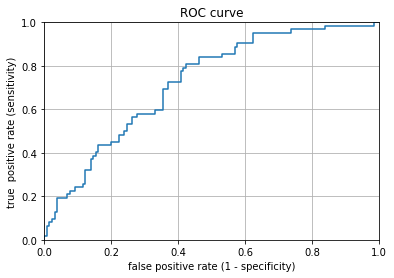

In [178]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('false positive rate (1 - specificity)')
plt.ylabel('true  positive rate (sensitivity)')
plt.grid(True)

 - ROC curve can help us to <code>**choose a threshold**</code> that balances sensitivity and specificity in a way that makes sense for our particulalr context
 - We can't actually <code>**see the thresholds**</code>  use to generate the curve on the ROC curbe itself

In [176]:
def evaluate_threshold(threshold):
    print(f'Sensitivity: {tpr[thresholds > threshold][-1]}')
    print(f'Specificity: {1 - fpr[thresholds > threshold][-1]}')

In [177]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [179]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


 <code>**AUC is the percentage**</code> of the ROC plot that is <code>**underneath the curve:**</code>

In [181]:
roc_auc_score = metrics.roc_auc_score(y_test, y_pred_prob)

In [182]:
print(roc_auc_score)

0.7227047146401985


 - AUC is useful as a <code>**single number summary**</code> of classifier performance.
 - If you randomly chose one positive and one negative observation, AUC represents the likelihood
 that your classifier will assing a <code>**higher predicted probability**</code> to the positive observation.
 - AUC is useful even when there is <code>**high class imbalance**</code>(unlike classification accuracy)

In [183]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score

In [185]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

<code>**Confusion matrix advantages**</code>
 - Allows us to calculate variaty of metrics
 - Useful for multi-class problems (more than two response classes)

<code>**ROC/AUC advantages:**</code>
 - Does not require to set a classification threshold
 - Still usefull when there is <code>**high class imbalance**</code>